In [1]:
import pandas as pd

In [2]:
pd.__version__

'2.2.3'

In [3]:
data=pd.read_excel("globalterrorismdb_0522dist.xlsx")

In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 216.0+ MB


In [6]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
#Let's filter the data by only keeping what's necessary
columns_to_keep = [
    'iyear', 'imonth', 'iday',
    'country_txt', 'region_txt',
    'attacktype1_txt', 'weaptype1_txt', 'targtype1_txt',
    'nkill', 'nwound',
    'suicide', 'claimed', 'gname',
    'summary', 'motive',
    'latitude', 'longitude'
]

data = data[columns_to_keep]


In [8]:
data.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
       'attacktype1_txt', 'weaptype1_txt', 'targtype1_txt', 'nkill', 'nwound',
       'suicide', 'claimed', 'gname', 'summary', 'motive', 'latitude',
       'longitude'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            209706 non-null  int64  
 1   imonth           209706 non-null  int64  
 2   iday             209706 non-null  int64  
 3   country_txt      209706 non-null  object 
 4   region_txt       209706 non-null  object 
 5   attacktype1_txt  209706 non-null  object 
 6   weaptype1_txt    209706 non-null  object 
 7   targtype1_txt    209706 non-null  object 
 8   nkill            197179 non-null  float64
 9   nwound           189770 non-null  float64
 10  suicide          209706 non-null  int64  
 11  claimed          143613 non-null  float64
 12  gname            209706 non-null  object 
 13  summary          143586 non-null  object 
 14  motive           55058 non-null   object 
 15  latitude         205015 non-null  float64
 16  longitude        205014 non-null  floa

In [10]:
#Renaming columns for better understanding
data.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region',
       'attacktype1_txt':'Attack_type', 'weaptype1_txt':'Weapon_type', 'targtype1_txt':'Target_type', 'nkill':'Killed', 'nwound':'Wounded',
       'suicide':'Is_suicide', 'claimed':'Is_claimed', 'gname':'Group_name', 'summary':'Summary', 'motive':'Motive', 'latitude':'Latitude',
       'longitude':'Longitude'},inplace=True)
data

,Year,Month,Day,Country,Region,Attack_type,Weapon_type,Target_type,Killed,Wounded,Is_suicide,Is_claimed,Group_name,Summary,Motive,Latitude,Longitude
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Unknown,Private Citizens & Property,1.0,0.0,0,NaN,MANO-D,NaN,NaN,18.456792,-69.951164
1,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),0.0,0.0,0,NaN,23rd of September Communist League,NaN,NaN,19.371887,-99.086624
2,1970,1,0,Philippines,Southeast Asia,Assassination,Unknown,Journalists & Media,1.0,0.0,0,NaN,Unknown,NaN,NaN,15.478598,120.599741
3,1970,1,0,Greece,Western Europe,Bombing/Explosion,Explosives,Government (Diplomatic),NaN,NaN,0,NaN,Unknown,NaN,NaN,37.997490,23.762728
4,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),NaN,NaN,0,NaN,Unknown,NaN,NaN,33.580412,130.396361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209701,2020,12,31,Yemen,Middle East & North Africa,Bombing/Explosion,Explosives,Private Citizens & Property,NaN,NaN,0,0.0,Houthi extremists (Ansar Allah),12/31/2020: Assailants fired mortar shells tar...,NaN,15.305307,43.019490
209702,2020,12,31,Yemen,Middle East & North Africa,Bombing/Explosion,Explosives,Private Citizens & Property,NaN,NaN,0,0.0,Houthi extremists (Ansar Allah),12/31/2020: Assailants attempted to plant expl...,NaN,13.931337,43.478924
209703,2020,12,31,Germany,Western Europe,Facility/Infrastructure Attack,Incendiary,Military,0.0,0.0,0,1.0,Left-wing extremists,12/31/2020: Assailants set fire to German Army...,NaN,51.342239,12.374772
209704,2020,12,31,Afghanistan,South Asia,Armed Assault,Firearms,Private Citizens & Property,1.0,0.0,0,0.0,Unknown,12/31/2020: Assailants shot and killed a civil...,NaN,34.523842,69.140304


In [ ]:
#Handling missing data
data.isna().sum().sort_values(ascending=False)


Motive         154648
Summary         66120
Is_claimed      66093
Wounded         19936
Killed          12527
Longitude        4692
Latitude         4691
Weapon_type         0
Target_type         0
Month               0
Attack_type         0
Is_suicide          0
Region              0
Group_name          0
Country             0
Day                 0
Year                0
dtype: int64

In [12]:
#Motive (many missing — ~154k),It's okay — most attacks don’t list motives
data['Motive'] = data['Motive'].fillna("Unknown motive")


In [13]:
#Summary (~66k missing),Text description of the attack. Safe to fill with:
data['Summary'] = data['Summary'].fillna("No summary provided")

In [14]:
data = data[~data['Latitude'].isna()]
data = data[~data['Longitude'].isna()]


In [20]:
#Killed & Wounded (some missing)These should be filled with 0 (meaning no deaths/injuries were recorded):
data['Killed'] = data['Killed'].fillna(0)
data['Wounded'] = data['Wounded'].fillna(0)


In [17]:
data['Is_claimed'].unique()

array([nan,  0.,  1., -9.])

In [18]:
data['Is_claimed'] = data['Is_claimed'].replace(-9.0, 'Unknown')
data['Is_claimed'] = data['Is_claimed'].fillna('Unknown')

In [21]:
data.isna().sum().sort_values(ascending=False)

Year           0
Wounded        0
Latitude       0
Motive         0
Summary        0
Group_name     0
Is_claimed     0
Is_suicide     0
Killed         0
Month          0
Target_type    0
Weapon_type    0
Attack_type    0
Region         0
Country        0
Day            0
Longitude      0
dtype: int64

In [22]:
#Removing Duplicates 
data.duplicated().sum()

11358

In [23]:
data = data.drop_duplicates()

In [ ]:
#now no more duplicate rows 
data.duplicated().sum()

0

In [ ]:
#Correcting Inaccurate or Inconsistent Data   ..Categorical 
data['Group_name'].value_counts(dropna=False)

Group_name
Unknown                                                  86918
Taliban                                                  11693
Islamic State of Iraq and the Levant (ISIL)               6751
Al-Shabaab                                                4370
Shining Path (SL)                                         3328
                                                         ...  
Committee for the Elimination of Killer Collaborators        1
Servants of Islam Organization                               1
Dnestr Rebels                                                1
Sovereign Panama Patriotic Front                             1
Martyr Karim Daraam Brigade                                  1
Name: count, Length: 3652, dtype: int64

In [26]:
data['Group_name'].unique()

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Reformed Niger Delta Avengers (RNDA)', 'Gumuz militia',
       'Martyr Karim Daraam Brigade'], dtype=object)

In [28]:
data['Country'].value_counts(dropna=False)

Country
Iraq                   26103
Afghanistan            18499
Pakistan               14838
India                  13368
Philippines             7709
                       ...  
North Korea                1
Falkland Islands           1
Wallis and Futuna          1
South Yemen                1
St. Kitts and Nevis        1
Name: count, Length: 203, dtype: int64

In [29]:
data['Country'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Guatemala', 'Venezuela', 'West Germany (FRG)', 'Switzerland',
       'Jordan', 'Brazil', 'Egypt', 'Argentina', 'Lebanon', 'Ireland',
       'Turkey', 'Paraguay', 'Iran', 'United Kingdom', 'Colombia',
       'Nicaragua', 'Spain', 'Netherlands', 'Belgium', 'Canada',
       'Australia', 'Pakistan', 'Ethiopia', 'Sweden', 'Costa Rica',
       'Bolivia', 'South Yemen', 'Cambodia', 'Israel', 'Poland', 'Taiwan',
       'Panama', 'West Bank and Gaza Strip', 'Austria', 'India', 'France',
       'Brunei', 'Zaire', "People's Republic of the Congo", 'Portugal',
       'Algeria', 'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco',
       'Cyprus', 'Afghanistan', 'Peru', 'Chile', 'Honduras', 'Yugoslavia',
       'Ecuador', 'New Zealand', 'Zambia', 'Malaysia', 'Singapore',
       'Botswana', 'Kuwait', 'Jamaica', 'Chad', 'North Yemen', 'Syria',
       'S

In [32]:
data['Region'].value_counts(dropna=False)

Region
Middle East & North Africa     55233
South Asia                     52608
Sub-Saharan Africa             22596
South America                  15943
Western Europe                 15264
Southeast Asia                 13526
Central America & Caribbean     8044
Eastern Europe                  5169
North America                   3679
East Asia                        730
Central Asia                     553
Australasia & Oceania            311
Name: count, dtype: int64

In [33]:
data['Attack_type'].value_counts(dropna=False)

Attack_type
Bombing/Explosion                      89409
Armed Assault                          46575
Assassination                          20416
Hostage Taking (Kidnapping)            13294
Facility/Infrastructure Attack         10893
Unknown                                10178
Unarmed Assault                         1117
Hostage Taking (Barricade Incident)     1052
Hijacking                                722
Name: count, dtype: int64

In [34]:
data['Attack_type'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [35]:
data['Weapon_type'].value_counts(dropna=False)

Weapon_type
Explosives                                                                     94775
Firearms                                                                       64248
Unknown                                                                        18547
Incendiary                                                                     11120
Melee                                                                           4084
Chemical                                                                         317
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      186
Sabotage Equipment                                                               166
Other                                                                            133
Biological                                                                        34
Fake Weapons                                                                      33
Radiological                                         

In [36]:
data['Target_type'].value_counts(dropna=False)

Target_type
Private Citizens & Property       48689
Military                          32490
Police                            27383
Government (General)              22301
Business                          19193
Unknown                            6405
Transportation                     6208
Religious Figures/Institutions     4873
Educational Institution            4528
Utilities                          4076
Terrorists/Non-State Militia       3655
Government (Diplomatic)            3615
Journalists & Media                3118
Violent Political Party            1987
Airports & Aircraft                1357
Telecommunication                  1155
NGO                                1078
Tourists                            429
Maritime                            352
Food or Water Supply                310
Abortion Related                    260
Other                               194
Name: count, dtype: int64

In [37]:
data['Target_type'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [41]:
data.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'Attack_type',
       'Weapon_type', 'Target_type', 'Killed', 'Wounded', 'Is_suicide',
       'Is_claimed', 'Group_name', 'Summary', 'Motive', 'Latitude',
       'Longitude'],
      dtype='object')

In [65]:
#Standardizing formats such as varying date formats,inconsistent capitalization.... 

In [48]:
#Categorical Columns (Standardize Case & Strip Whitespace)
cat_cols = ['Country', 'Region', 'Attack_type', 'Weapon_type', 'Target_type', 'Group_name']

for col in cat_cols:
    data[col] = data[col].str.strip().str.title()


In [ ]:
#Standardizing formats,varying date format,inconsistent capitalization 
faulty_dates = pd.to_datetime(data[['Year', 'Month', 'Day']], errors='coerce')
data[faulty_dates.isna()][['Year', 'Month', 'Day']].head()
#there's no 0 day or 0 month in real calendar so lets fix it

,Year,Month,Day
1,1970,0,0
2,1970,1,0
3,1970,1,0
4,1970,1,0
96,1970,3,0


In [55]:
data['Month'] = data['Month'].replace(0, 1)
data['Day'] = data['Day'].replace(0, 1)
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']], errors='coerce')


In [56]:
data['Date'].unique()

<DatetimeArray>
['1970-07-02 00:00:00', '1970-01-01 00:00:00', '1970-01-02 00:00:00',
 '1970-01-03 00:00:00', '1970-01-06 00:00:00', '1970-01-08 00:00:00',
 '1970-01-09 00:00:00', '1970-01-10 00:00:00', '1970-01-12 00:00:00',
 '1970-01-13 00:00:00',
 ...
 '2020-12-22 00:00:00', '2020-12-23 00:00:00', '2020-12-24 00:00:00',
 '2020-12-25 00:00:00', '2020-12-26 00:00:00', '2020-12-27 00:00:00',
 '2020-12-28 00:00:00', '2020-12-29 00:00:00', '2020-12-30 00:00:00',
 '2020-12-31 00:00:00']
Length: 17149, dtype: datetime64[ns]

In [57]:
data['Date'].isna().sum()

0

In [58]:
data['Date'].head(10)

0   1970-07-02
1   1970-01-01
2   1970-01-01
3   1970-01-01
4   1970-01-01
5   1970-01-01
6   1970-01-02
7   1970-01-02
8   1970-01-02
9   1970-01-03
Name: Date, dtype: datetime64[ns]

In [60]:
#Dealing with outliers 
data[['Killed', 'Wounded']].describe()


,Killed,Wounded
count,193656.000000,193656.000000
mean,2.366753,2.963538
std,11.253167,40.483927
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,1700.000000,10878.000000


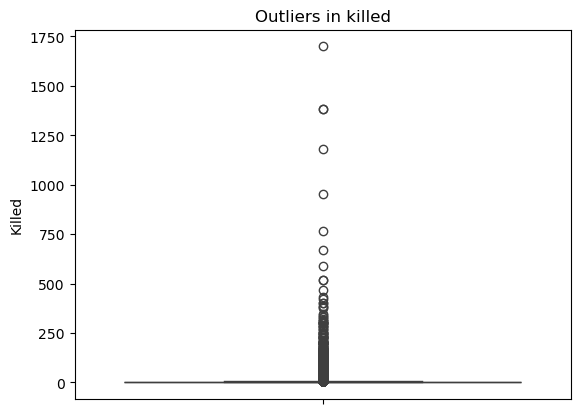

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data['Killed'])
plt.title("Outliers in killed")
plt.show()


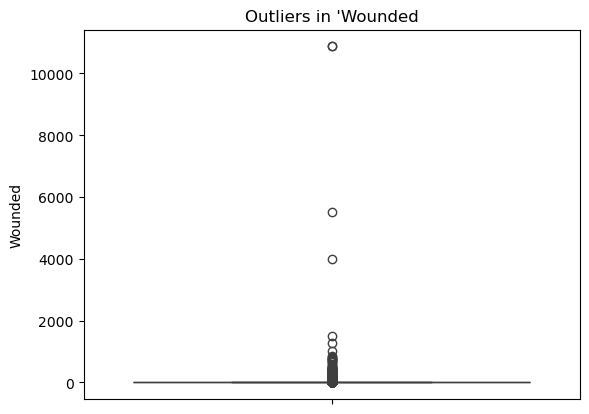

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data['Wounded'])
plt.title("Outliers in 'Wounded")
plt.show()


In [64]:
#these can also be valid rare events so let those extreme values be as it is..

In [66]:
#Finally let's fix structural errors like inconsistent column names or data types
#already fixed inconsistent column names  now lets check inconsistent data types 
data.dtypes

Year                    int64
Month                   int64
Day                     int64
Country                object
Region                 object
Attack_type            object
Weapon_type            object
Target_type            object
Killed                float64
Wounded               float64
Is_suicide              int64
Is_claimed             object
Group_name             object
Summary                object
Motive                 object
Latitude              float64
Longitude             float64
Date           datetime64[ns]
dtype: object

In [67]:
#killed and wounded columns should be int 
data['Killed']=data['Killed'].astype(int)
data['Wounded']=data['Wounded'].astype(int)

In [ ]:
#check and fix inconsistent index
data

,Year,Month,Day,Country,Region,Attack_type,Weapon_type,Target_type,Killed,Wounded,Is_suicide,Is_claimed,Group_name,Summary,Motive,Latitude,Longitude,Date
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Unknown,Private Citizens & Property,1,0,0,Unknown,Mano-D,No summary provided,Unknown motive,18.456792,-69.951164,1970-07-02
1,1970,1,1,Mexico,North America,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),0,0,0,Unknown,23Rd Of September Communist League,No summary provided,Unknown motive,19.371887,-99.086624,1970-01-01
2,1970,1,1,Philippines,Southeast Asia,Assassination,Unknown,Journalists & Media,1,0,0,Unknown,Unknown,No summary provided,Unknown motive,15.478598,120.599741,1970-01-01
3,1970,1,1,Greece,Western Europe,Bombing/Explosion,Explosives,Government (Diplomatic),0,0,0,Unknown,Unknown,No summary provided,Unknown motive,37.997490,23.762728,1970-01-01
4,1970,1,1,Japan,East Asia,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),0,0,0,Unknown,Unknown,No summary provided,Unknown motive,33.580412,130.396361,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209701,2020,12,31,Yemen,Middle East & North Africa,Bombing/Explosion,Explosives,Private Citizens & Property,0,0,0,0.0,Houthi Extremists (Ansar Allah),12/31/2020: Assailants fired mortar shells tar...,Unknown motive,15.305307,43.019490,2020-12-31
209702,2020,12,31,Yemen,Middle East & North Africa,Bombing/Explosion,Explosives,Private Citizens & Property,0,0,0,0.0,Houthi Extremists (Ansar Allah),12/31/2020: Assailants attempted to plant expl...,Unknown motive,13.931337,43.478924,2020-12-31
209703,2020,12,31,Germany,Western Europe,Facility/Infrastructure Attack,Incendiary,Military,0,0,0,1.0,Left-Wing Extremists,12/31/2020: Assailants set fire to German Army...,Unknown motive,51.342239,12.374772,2020-12-31
209704,2020,12,31,Afghanistan,South Asia,Armed Assault,Firearms,Private Citizens & Property,1,0,0,0.0,Unknown,12/31/2020: Assailants shot and killed a civil...,Unknown motive,34.523842,69.140304,2020-12-31


In [69]:
data=data.reset_index().drop(columns="index")

In [70]:
data

,Year,Month,Day,Country,Region,Attack_type,Weapon_type,Target_type,Killed,Wounded,Is_suicide,Is_claimed,Group_name,Summary,Motive,Latitude,Longitude,Date
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Unknown,Private Citizens & Property,1,0,0,Unknown,Mano-D,No summary provided,Unknown motive,18.456792,-69.951164,1970-07-02
1,1970,1,1,Mexico,North America,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),0,0,0,Unknown,23Rd Of September Communist League,No summary provided,Unknown motive,19.371887,-99.086624,1970-01-01
2,1970,1,1,Philippines,Southeast Asia,Assassination,Unknown,Journalists & Media,1,0,0,Unknown,Unknown,No summary provided,Unknown motive,15.478598,120.599741,1970-01-01
3,1970,1,1,Greece,Western Europe,Bombing/Explosion,Explosives,Government (Diplomatic),0,0,0,Unknown,Unknown,No summary provided,Unknown motive,37.997490,23.762728,1970-01-01
4,1970,1,1,Japan,East Asia,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),0,0,0,Unknown,Unknown,No summary provided,Unknown motive,33.580412,130.396361,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193651,2020,12,31,Yemen,Middle East & North Africa,Bombing/Explosion,Explosives,Private Citizens & Property,0,0,0,0.0,Houthi Extremists (Ansar Allah),12/31/2020: Assailants fired mortar shells tar...,Unknown motive,15.305307,43.019490,2020-12-31
193652,2020,12,31,Yemen,Middle East & North Africa,Bombing/Explosion,Explosives,Private Citizens & Property,0,0,0,0.0,Houthi Extremists (Ansar Allah),12/31/2020: Assailants attempted to plant expl...,Unknown motive,13.931337,43.478924,2020-12-31
193653,2020,12,31,Germany,Western Europe,Facility/Infrastructure Attack,Incendiary,Military,0,0,0,1.0,Left-Wing Extremists,12/31/2020: Assailants set fire to German Army...,Unknown motive,51.342239,12.374772,2020-12-31
193654,2020,12,31,Afghanistan,South Asia,Armed Assault,Firearms,Private Citizens & Property,1,0,0,0.0,Unknown,12/31/2020: Assailants shot and killed a civil...,Unknown motive,34.523842,69.140304,2020-12-31


In [72]:
#Export cleaned data to csv,xlsx files 
data.to_csv("Cleaned_GTD.csv")
data.to_excel("Cleaned_GTD1.xlsx")